## Лабораторна робота 3. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def get_data(data_path: str):
  data = pd.read_csv(data_path)
  return data

In [3]:
data = get_data(data_path="motorbike_ambulance_calls.csv")
data.info(verbose=True)
print("------------------------")
print(str(data.shape[0]) + " - строк")
print(str(data.shape[1]) + " - столбцов")
print("------------------------")
for i in range(data.shape[1]):    
    print(data.columns[i] + " | max(" + str(data.max()[i]) + ") | min(" + str(data.min()[i]) + ")")
print("------------------------")
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB
------------------------
17379 - строк
15 - столбцов
------------------------
index | max(17379) | min(1)
date | max(9/9/12) | min(1

,index,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,5017.0295,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,8690.0000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,13034.5000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,17379.0000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [5]:
data.isnull().sum()

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

**Висновки з 1-3 завдання (детальні)**



1. Було завантажено вибірку та отримано основну інформацію  по ній.
2. Вибірка має 17379 прикладів  
3. Всі змінні не мають пропусків.



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [6]:
def tranform_date(df: pd.DataFrame, date_col_name: str):
  df[date_col_name] = pd.to_datetime(df[date_col_name]).dt.date
  return df
  
data = tranform_date(data, 'date')

data["date"].head(190)

0      2011-01-01
1      2011-01-01
2      2011-01-01
3      2011-01-01
4      2011-01-01
          ...    
185    2011-01-09
186    2011-01-09
187    2011-01-09
188    2011-01-09
189    2011-01-09
Name: date, Length: 190, dtype: object

In [7]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
  first_day = df[date_col_name].min()
  last_day = df[date_col_name].max()
  print(f"First day of dataset - {first_day}.\n Last day of dataset - {last_day}")

get_time_limits(data, "date")

First day of dataset - 2011-01-01.
 Last day of dataset - 2012-12-31


In [ ]:
#your conclusions: тип данних змінної date було змінено на date type за допомогою методу to_datetime, після чого були виведені
# часові межі датасету.

#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [8]:
#data.head(20)
data_categorical = data[["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit"]]
data_categorical.head(800)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit
0,spring,0,1,0,0,6,0,1
1,spring,0,1,1,0,6,0,1
2,spring,0,1,2,0,6,0,1
3,spring,0,1,3,0,6,0,1
4,spring,0,1,4,0,6,0,1
...,...,...,...,...,...,...,...,...
795,spring,0,2,14,0,6,0,3
796,spring,0,2,15,0,6,0,3
797,spring,0,2,16,0,6,0,3
798,spring,0,2,17,0,6,0,2


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [9]:
def switch(x):
    if(x == "spring" or x == 1): 
        return 1
    elif(x == "winter" or x == 4):
        return 4
    elif(x == "autumn" or x == 3):
        return 3
    else:
        return 2
        

def encode_season(df: pd.DataFrame, season_col_name: str):
  df[season_col_name] = df[season_col_name].transform(lambda x: switch(x))
  return df
  
data_categorical = encode_season(data_categorical, 'season')

data_categorical["season"].head(12000)

<ipython-input-9-f85d288972c9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[season_col_name] = df[season_col_name].transform(lambda x: switch(x))


0        1
1        1
2        1
3        1
4        1
        ..
11995    2
11996    2
11997    2
11998    2
11999    2
Name: season, Length: 12000, dtype: int64

**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

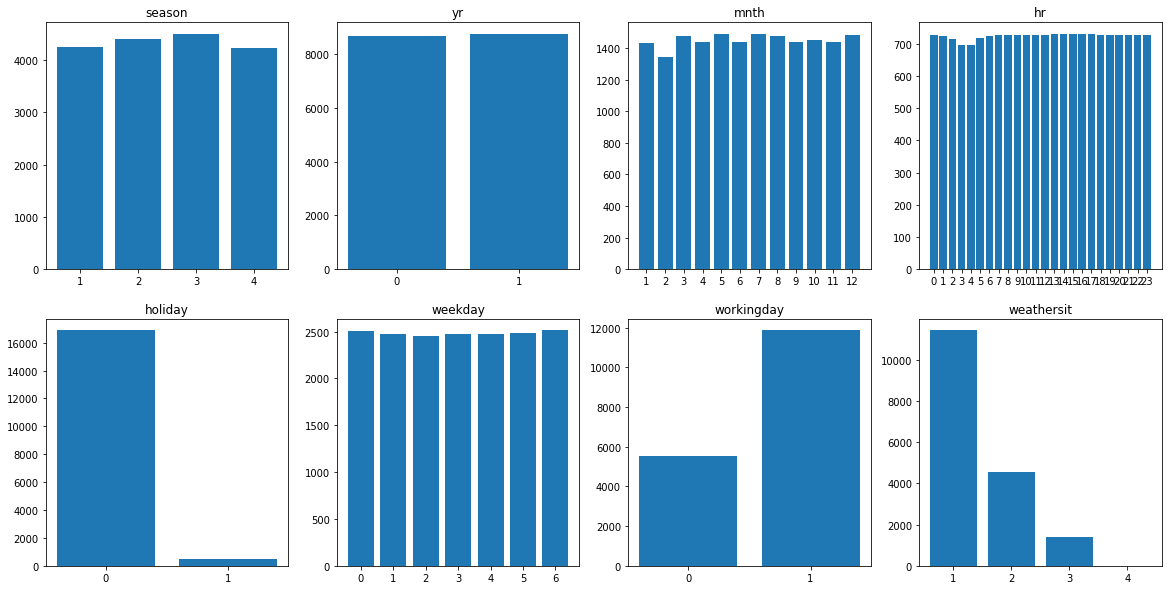

In [10]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(data_categorical, range(data_categorical.shape[1])):
    ax[subplot//4, subplot%4].set_title(variable)
    ax[subplot//4, subplot%4].set_xticks(data_categorical[variable].value_counts().index)
    ax[subplot//4, subplot%4].bar(data_categorical[variable].value_counts().index, data_categorical[variable].value_counts().values)
    

**Висновки з 5-7 завдання (детальні)**



1. Я виділив змінні "season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit" в окремий датасет оскільки вони на мою думку є категоріальними.  
2. Я перетворив змінну season в числову шкалу (1:spring, 2:summer, 3:autumn, 4:winter).
3. Я побудував графік subplot по всім змінним виборки data_categorical, дивлячись на ньогозрозуміло що: 
- найбільша аварій трапляється в осени на другому місці літо зима ж на останьому місці, це вібувається тому що більшість водіїв не їздить в зимку на мотоциклах, а в літку і в осени сезон для них. В осени ж більше аварій ніх влітку через погодні умови.
- аварії рідше трабляються в проміжок з 1 до 5 оскільки більшість людей в цей час сплять.
- майже не траплялося аварій у свята, томущо свята займають меньшість днів в календарі та під час них людям рідко потрібно кудись їхати.
- більшість аварій трапляласа в робочі дні, томущо їх також більше ні вихідних.
- більшість аварій трапилась за гарної погоди, здавалось би погані погодні умови заважають їздити, проте днів з гарною погодою було на багато більше та більшість водіїв просто не використовували мотоцикли при поганих погодних умовах.  


#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [11]:
data_numerical = data[["temp", "atemp", "hum", "windspeed", "cnt"]]
data_numerical.head(100)

,temp,atemp,hum,windspeed,cnt
0,0.24,0.2879,0.81,0.0000,16
1,0.22,0.2727,0.80,0.0000,40
2,0.22,0.2727,0.80,0.0000,32
3,0.24,0.2879,0.75,0.0000,13
4,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...
95,0.24,0.2273,0.48,0.2239,2
96,0.22,0.2273,0.47,0.1642,3
97,0.20,0.1970,0.47,0.2239,33
98,0.18,0.1818,0.43,0.1940,88


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

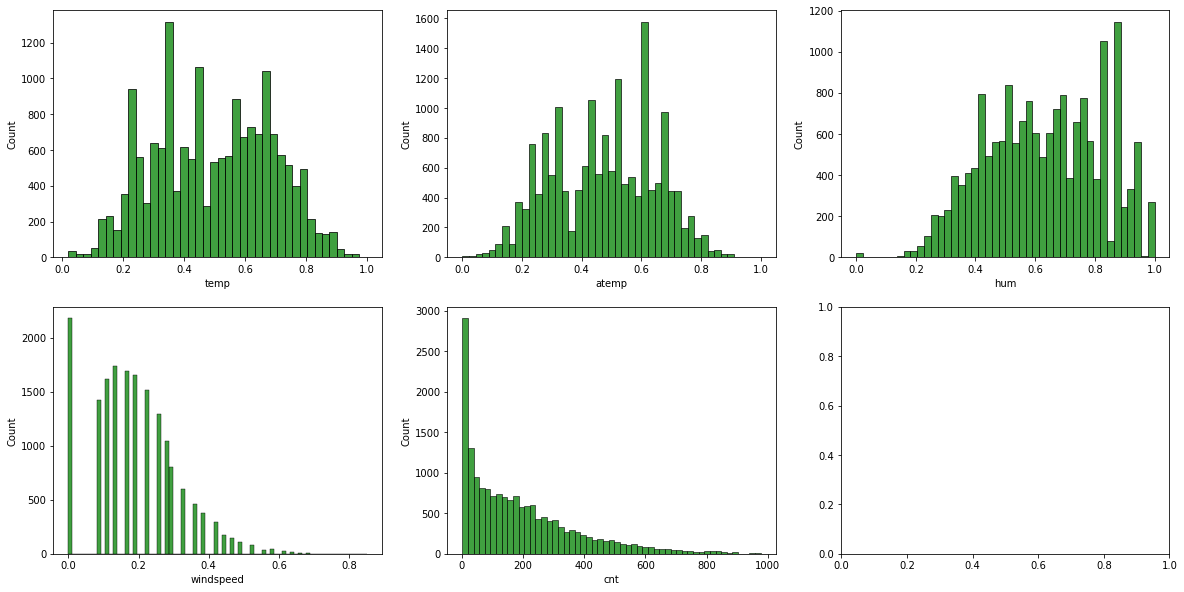

In [12]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for variable, subplot in zip(data_numerical, ax.flatten()):
    sns.histplot(x=variable, data=data_numerical, ax=subplot, color="green")

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

Коефіціент нахилу = 1.2774116037490577


Text(0.5, 1.0, 'cnt')

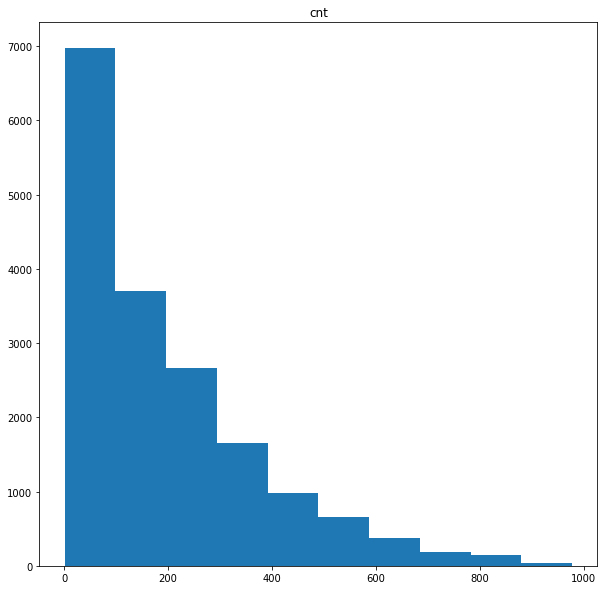

In [13]:
print("Коефіціент нахилу = " + str(data_numerical["cnt"].skew(skipna=True)))

fig, ax = plt.subplots(figsize=(10, 10))
plt.hist(data_numerical["cnt"])
plt.title("cnt")

**Висновки з 8-10 завдання (детальні)**



1. В числовий датасет я помістив аргументи "temp", "atemp", "hum", "windspeed", "cnt", деякі числові змінні я не додавав до цього датасету: "index" котра не несе в собі ніякої інформативності та "date" котра представлена іншими в другому датасеті.
2. Побудвавши гістограми розподілу по всім числовим змінним проаналізуємо результат:
- змінні "temp", "atemp" схожі, найбільша кількість аварій відбувалась під час серединних значень томущо вони найчастіше зустрічаються та при дуже малих та високих температурах мало людей пересуваються на мотоциклах.
- змінна "hum" має такі ж особливості розподілу як і дві попередні.
- змінна windspeed демонструє що найбільше аварії траплялись при найменьшій с силі вітру, тому що вона найчастіше зустрічається.
3. Ця гістограмя демонструє що з збільшенням кількості дзвінків в швидку з кількість таких днів зменьшується з коефіціентом нахилу 1.277.



#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

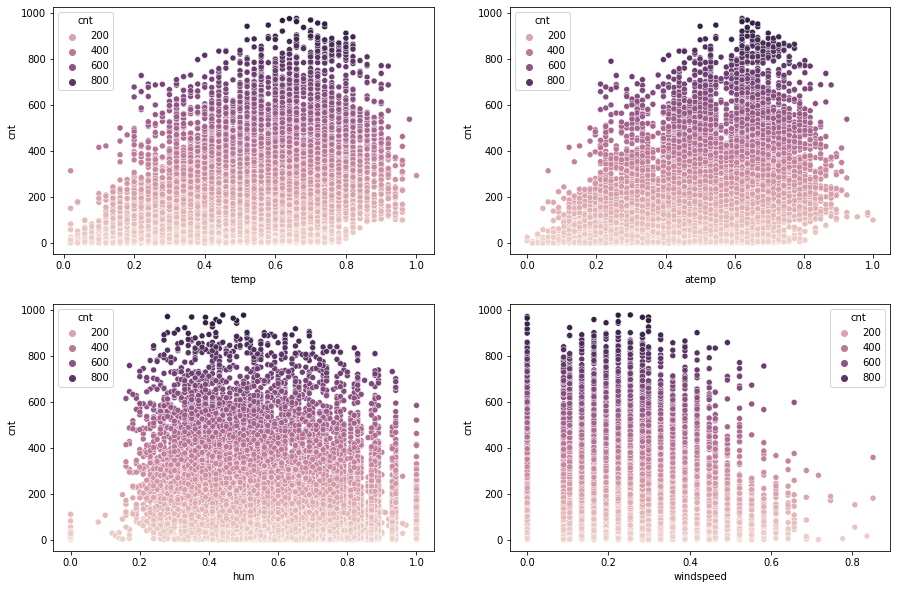

In [14]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
for var, subplot in zip(data_numerical.drop('cnt', axis =1), ax.flatten()):
    sns.scatterplot(data=data_numerical, x=var, y='cnt', ax=subplot, hue="cnt")

In [15]:
data_numerical = data_numerical.drop('atemp', axis =1)
data_numerical.head()

,temp,hum,windspeed,cnt
0,0.24,0.81,0.0,16
1,0.22,0.80,0.0,40
2,0.22,0.80,0.0,32
3,0.24,0.75,0.0,13
4,0.24,0.75,0.0,1


**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

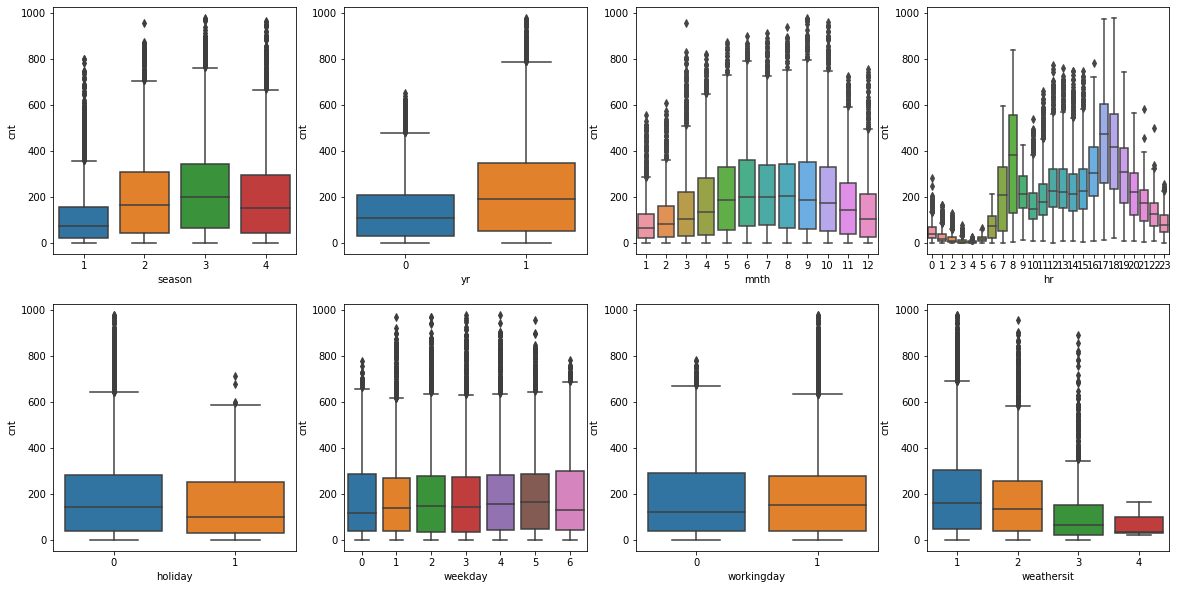

In [16]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(data_categorical, ax.flatten()):
    sns.boxplot(data=data_categorical, x=var, y=data_numerical['cnt'], ax=subplot)

**Висновки з 11-12 завдання (детальні)**



1. Співвідношення змінних temp і atemp з цьіловою змінною є майже однаковими, тому що ці змінні відображають одну і ту же характеристику а саме температуру. Отже на далі я буду використовувати тільки одну з них. Всі числові змінні добре розподілені на по всій області графіку, це означає що цільова змінна (кількість викликів) добре залежить від них.
2. На графіка співвідношення між категоріальними змінними і цільовою змінною cnt є досить велика кількість викидів, на мою думку це відбувається тому що часові рамки спостереження 2 роки, що є досить великим терміно з великою кількістью прикладів.  
3. ...



**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

<AxesSubplot:title={'center':'data_numerical correlation correlation Spearman'}>

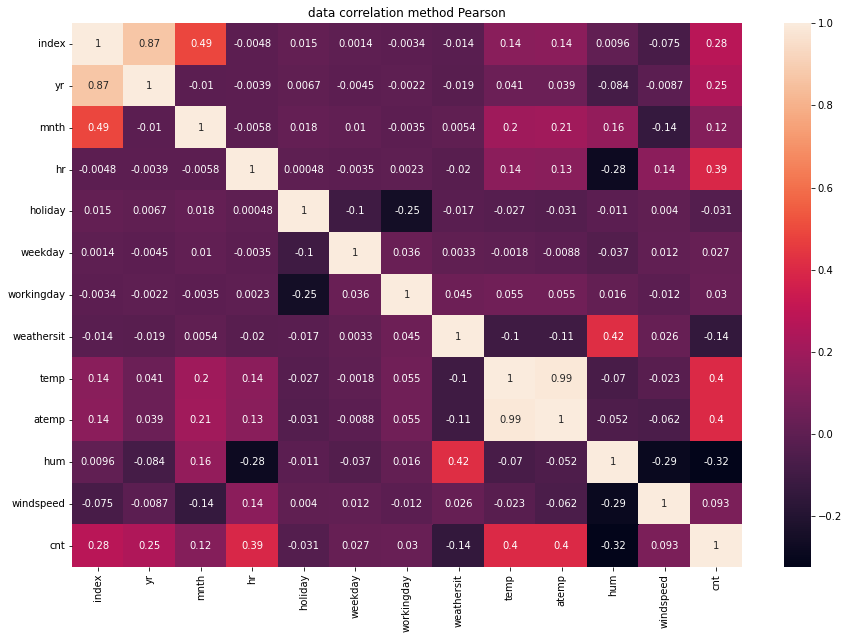

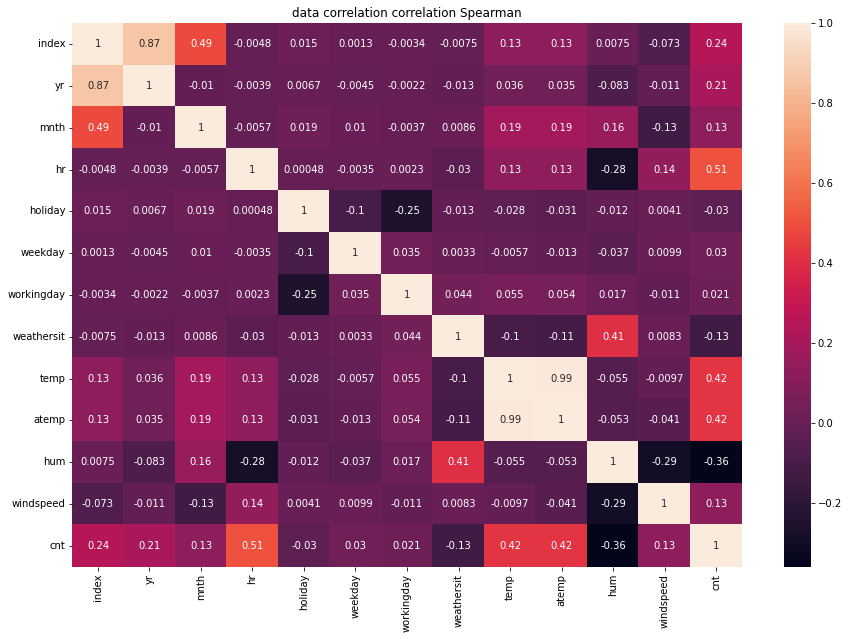

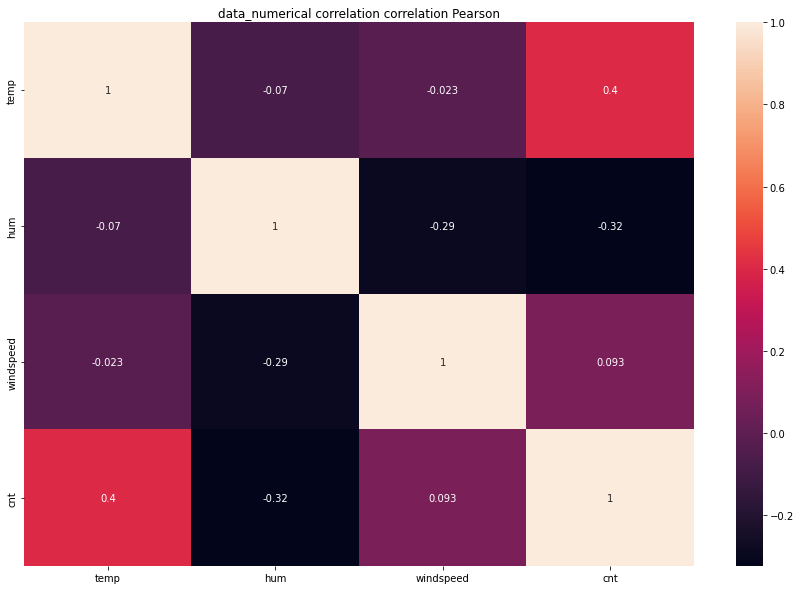

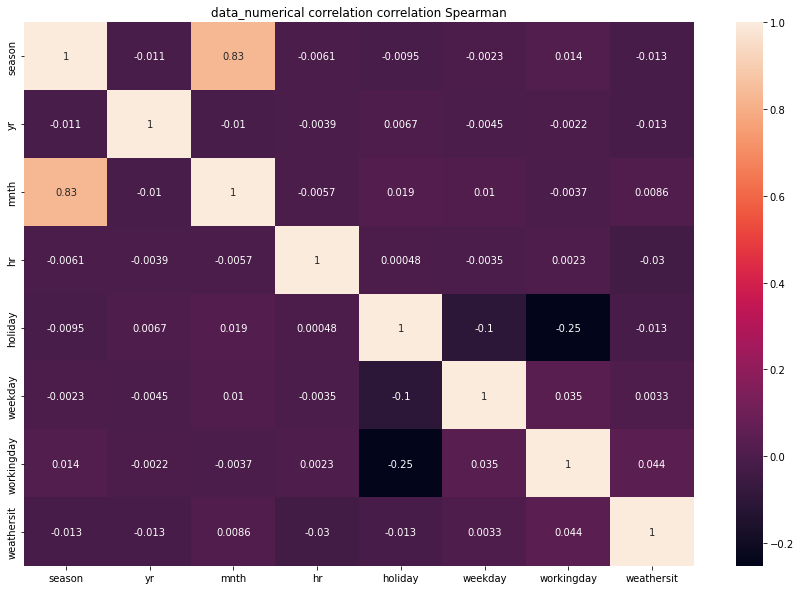

In [17]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.title('data correlation method Pearson')
sns.heatmap(data.corr(method='pearson'), cbar=True, annot=True, fmt='.2g')

fig, ax = plt.subplots(figsize=(15, 10))
plt.title('data correlation correlation Spearman')
sns.heatmap(data.corr(method='spearman'), cbar=True, annot=True, fmt='.2g')

fig, ax = plt.subplots(figsize=(15, 10))
plt.title('data_numerical correlation correlation Pearson')
sns.heatmap(data_numerical.corr(method='pearson'), cbar=True, annot=True, fmt='.2g')

fig, ax = plt.subplots(figsize=(15, 10))
plt.title('data_numerical correlation correlation Spearman')
sns.heatmap(data_categorical.corr(method='spearman'), cbar=True, annot=True, fmt='.2g')

In [ ]:
Судячи з данних матриць кореляції змінні temp і atemp корелюють майже максимально тому щоб запобігти мультиколінеарності я 
видалив одну з них. Також по причині кореляції змінних index i yr, я не включав у нову числову вибірку змінну index через її 
меншу інформативність. На основній виборці я використав обива методи кореляціі. На числову виборку я використав метод Пірсона,
тому що цей метод боре працює на данних близьких до нормального розподілу. На категоріальну виборку я використав метод Спірмана
оскільки він добре працює на категоріальних даних. Дивлячись на отанні дві матриці кореляції зрозуміло що цільова змінна cmt 
добре корелює з temp а month з season що й не дивно. 

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [18]:
def get_dummies(df: pd.DataFrame):
    features = pd.concat([df,
                        pd.get_dummies(df['season']),
                        pd.get_dummies(df['mnth'], prefix='mnth'),
                        pd.get_dummies(df['weekday'], prefix='weekday'),
                        pd.get_dummies(df['weathersit'], prefix='weathersit'),
                        ], axis = 1)
    features = features.drop(['season',
                            'mnth', 
                            'weekday', 
                            'weathersit'
                            ], axis = 1)
    return features

In [19]:
features = get_dummies(data)
features.head()

,index,date,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,2011-01-01,0,0,0,0,0.24,0.2879,0.81,0.0,...,0,0,0,0,0,1,1,0,0,0
1,2,2011-01-01,0,1,0,0,0.22,0.2727,0.80,0.0,...,0,0,0,0,0,1,1,0,0,0
2,3,2011-01-01,0,2,0,0,0.22,0.2727,0.80,0.0,...,0,0,0,0,0,1,1,0,0,0
3,4,2011-01-01,0,3,0,0,0.24,0.2879,0.75,0.0,...,0,0,0,0,0,1,1,0,0,0
4,5,2011-01-01,0,4,0,0,0.24,0.2879,0.75,0.0,...,0,0,0,0,0,1,1,0,0,0


2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [20]:
features['night_hours'] = pd.cut(data["hr"], bins=[0, 6, 21, 23], labels=[1, 0, 1], ordered=False, include_lowest=True)
features = features.drop('hr', axis = 1)

**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [21]:
features_lr = features.drop(['spring', 'mnth_4', 'weekday_0', 'weathersit_1','atemp', 'date'], axis = 1)

In [22]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
    X = df.drop(columns=[target], axis = 1)
    y = df[target]
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=55, shuffle = True)
    return X_train, X_test, y_train, y_test

In [23]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [24]:
def train_linear_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

model = train_linear_model(X_train, y_train)

In [25]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 14881.263, test: 14856.096
R^2 train: 0.548, test: 0.547


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

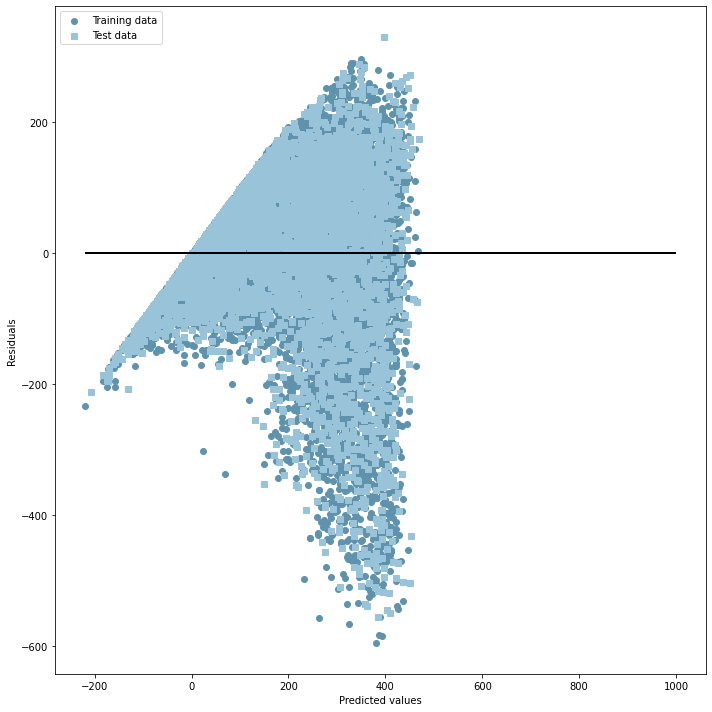

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

**Висновки з завдання (детальні)**



1. Ми поділили всі варіанти змінної hr на день і нічь та винесли це в окрему змінну night_hours (1 нічь, 0 день) видаливши змінну hr. Також ми ввели фіктивні змінні пізніше видаливши оригінали та по одній з змінних-індикаторів. 
2. Атрибит date ми видаляємо через його велику кореляцію з роком місяце і днем котри вже представлені в наашій виборці, тому що він по суті складається з них. Також ми видаляємо змінну atemp, тому що вона дуже сильно корелює і також має схоже значення з temp.   
3. В кінці була побудована модель лінійної регресії котра отримала отримала серендьно квадратичну похибку в 14856 та коефіціент детермінації 0.547 що, на мою думку, є не дуже гарним, проте приємливим результатом для цього методу.

